In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

eos = pd.read_csv('https://raw.githubusercontent.com/Juevan/Projeto_Grupo_M3_CNSEG/main/dados_limpos/dados_limpos_sem_filtro/EOS_limpo.csv')
nem = pd.read_csv('https://raw.githubusercontent.com/Juevan/Projeto_Grupo_M3_CNSEG/main/dados_limpos/dados_limpos_sem_filtro/NEM_Limpo.csv')
xrp = pd.read_csv('https://raw.githubusercontent.com/Juevan/Projeto_Grupo_M3_CNSEG/main/dados_limpos/dados_limpos_sem_filtro/XRP_limpo.csv')
bitcoin = pd.read_csv('https://raw.githubusercontent.com/Juevan/Projeto_Grupo_M3_CNSEG/main/dados_limpos/dados_limpos_sem_filtro/bitcoin_limpo.csv')
chainlink = pd.read_csv('https://raw.githubusercontent.com/Juevan/Projeto_Grupo_M3_CNSEG/main/dados_limpos/dados_limpos_sem_filtro/chainlink_limpo.csv')
cosmos = pd.read_csv('https://raw.githubusercontent.com/Juevan/Projeto_Grupo_M3_CNSEG/main/dados_limpos/dados_limpos_sem_filtro/cosmos_limpo.csv')
ethereum = pd.read_csv('https://raw.githubusercontent.com/Juevan/Projeto_Grupo_M3_CNSEG/main/dados_limpos/dados_limpos_sem_filtro/litecoin_limpo.csv')
litecoin = pd.read_csv('https://raw.githubusercontent.com/Juevan/Projeto_Grupo_M3_CNSEG/main/dados_limpos/dados_limpos_sem_filtro/litecoin_limpo.csv')
solana = pd.read_csv('https://raw.githubusercontent.com/Juevan/Projeto_Grupo_M3_CNSEG/main/dados_limpos/dados_limpos_sem_filtro/solana_limpo.csv')
stellar = pd.read_csv('https://raw.githubusercontent.com/Juevan/Projeto_Grupo_M3_CNSEG/main/dados_limpos/dados_limpos_sem_filtro/stellar_limpo_filtro.csv')
tether = pd.read_csv('https://raw.githubusercontent.com/Juevan/Projeto_Grupo_M3_CNSEG/main/dados_limpos/dados_limpos_sem_filtro/tether_limpo.csv')

def variation_percentage(column):
    return (column.iloc[-1] - column.iloc[0]) / column.iloc[0] * 100

In [478]:
dfs = [eos, nem, xrp, bitcoin, chainlink, cosmos, ethereum, litecoin, solana, stellar, tether]
dfs_unificados = pd.concat(dfs, axis=0, join='inner')
dfs_unificados['Date'] = pd.to_datetime(dfs_unificados['Date'])
dfs_unificados


,serial_number,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,EOS,EOS,2017-07-02 23:59:59,2.8775,0.8226,0.9965,2.7101,3.204520e+08,0.000000e+00
1,2,EOS,EOS,2017-07-03 23:59:59,5.3960,2.6323,2.7174,4.0866,4.149500e+08,6.549307e+08
2,3,EOS,EOS,2017-07-04 23:59:59,4.1912,2.9334,4.0980,3.3720,2.185590e+08,5.501552e+08
3,4,EOS,EOS,2017-07-05 23:59:59,3.5235,2.7301,3.3560,3.0032,1.243390e+08,5.006264e+08
4,5,EOS,EOS,2017-07-06 23:59:59,3.8675,3.0078,3.0143,3.3613,1.774630e+08,5.683615e+08
...,...,...,...,...,...,...,...,...,...,...
2313,2314,Tether,USDT,2021-07-02 23:59:59,1.0008,1.0000,1.0003,1.0000,4.562659e+10,6.237592e+10
2314,2315,Tether,USDT,2021-07-03 23:59:59,1.0007,0.9999,1.0000,1.0000,4.119499e+10,6.237115e+10
2315,2316,Tether,USDT,2021-07-04 23:59:59,1.0002,0.9989,1.0000,0.9995,4.306666e+10,6.234274e+10
2316,2317,Tether,USDT,2021-07-05 23:59:59,1.0010,0.9994,0.9994,1.0007,4.721585e+10,6.241550e+10


# PERGUNTAS E RESPOSTAS

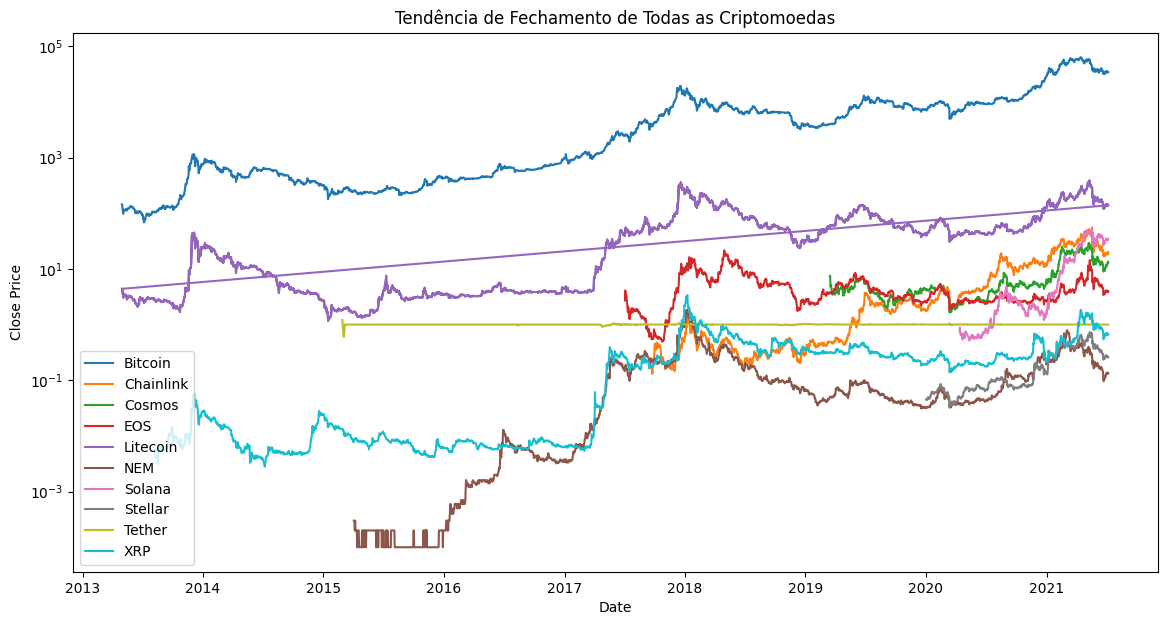

In [479]:
# 1. Como se comportaram os valores para todas as criptomoedas? Tendência de queda ou aumento?
crypto_grouped = dfs_unificados.groupby('Name')
variation = crypto_grouped['Close'].apply(variation_percentage)

# Plotando a tendência de fechamento
plt.figure(figsize=(14, 7))
for name, group in crypto_grouped:
    plt.plot(group['Date'], group['Close'], label=name)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.yscale('log')
plt.title('Tendência de Fechamento de Todas as Criptomoedas')
plt.legend()
plt.show()

In [480]:
# 2. Quais os valores médios para todas as criptomoedas?
crypto_grouped = dfs_unificados.groupby('Name')
mean_values = crypto_grouped[['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']].mean()

print("Valores médios para todas as criptomoedas:")
mean_values

Valores médios para todas as criptomoedas:


,High,Low,Open,Close,Volume,Marketcap
Name,,,,,,
Bitcoin,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
Chainlink,6.633355,5.920969,6.294481,6.308584,6.923608e+08,2.494642e+09
Cosmos,7.141688,6.367329,6.759896,6.768099,2.963413e+08,1.332950e+09
EOS,4.839459,4.384313,4.623295,4.624088,1.888406e+09,3.941338e+09
Litecoin,51.344396,46.931227,49.247365,49.279008,1.284851e+09,2.934139e+09
NEM,0.132113,0.116247,0.124702,0.124662,4.428130e+07,1.121956e+09
Solana,11.190480,9.647554,10.400223,10.471388,1.956751e+08,2.588164e+09
Stellar,0.203268,0.181078,0.191856,0.192263,9.028870e+08,4.264939e+09
Tether,1.006776,0.995670,1.000655,1.000695,1.938484e+10,6.128741e+09


In [481]:
# 3. Em quais anos houve maiores quedas e valorizações?
dfs_unificados['Year'] = dfs_unificados['Date'].dt.year
yearly_grouped = dfs_unificados.groupby(['Name', 'Year'])

yearly_variation = yearly_grouped['Close'].apply(variation_percentage)
yearly_variation = yearly_variation.to_frame()
yearly_variation


Close
Name      Year              
Bitcoin   2013    421.661824
          2014    -58.491963
          2015     37.014597
          2016    121.889836
          2017   1318.015215
          2018    -72.595406
          2019     87.161742
          2020    302.791907
          2021     16.548705
Chainlink 2017    254.507955
          2018    -60.550709
          2019    491.015364
          2020    523.851434
          2021     69.133130
Cosmos    2019    -43.810298
          2020     48.239806
          2021    124.234059
EOS       2017    223.456699
          2018    -70.973177
          2019     -3.108692
          2020      0.030802
          2021     47.313501
Litecoin  2013    455.373070
          2014    -88.954476
          2015     28.944053
          2016     23.263038
          2017   5044.427697
          2018    -86.697026
          2019     29.269010
          2020    196.756605
          2021     10.104785
NEM       2015    -33.333333
          2016   1750.000000
          2017  30311.764706
          2018    -93.844824
          2019    -51.437216
          2020    527.300613
          2021    -39.901035
Solana    2020     94.503090
          2021   1760.327887
Stellar   2020    182.197802
          2021     96.525680
Tether    2015    -17.060629
          2016      0.000000
          2017      1.230000
          2018      0.635362
          2019     -1.826574
          2020      0.080016
          2021     -0.179659
XRP       2013    387.500000
          2014     -9.293680
          2015    -75.409836
          2016      6.666667
          2017  35846.875000
          2018    -85.248850
          2019    -47.121711
          2020     14.063311
          2021    180.286436

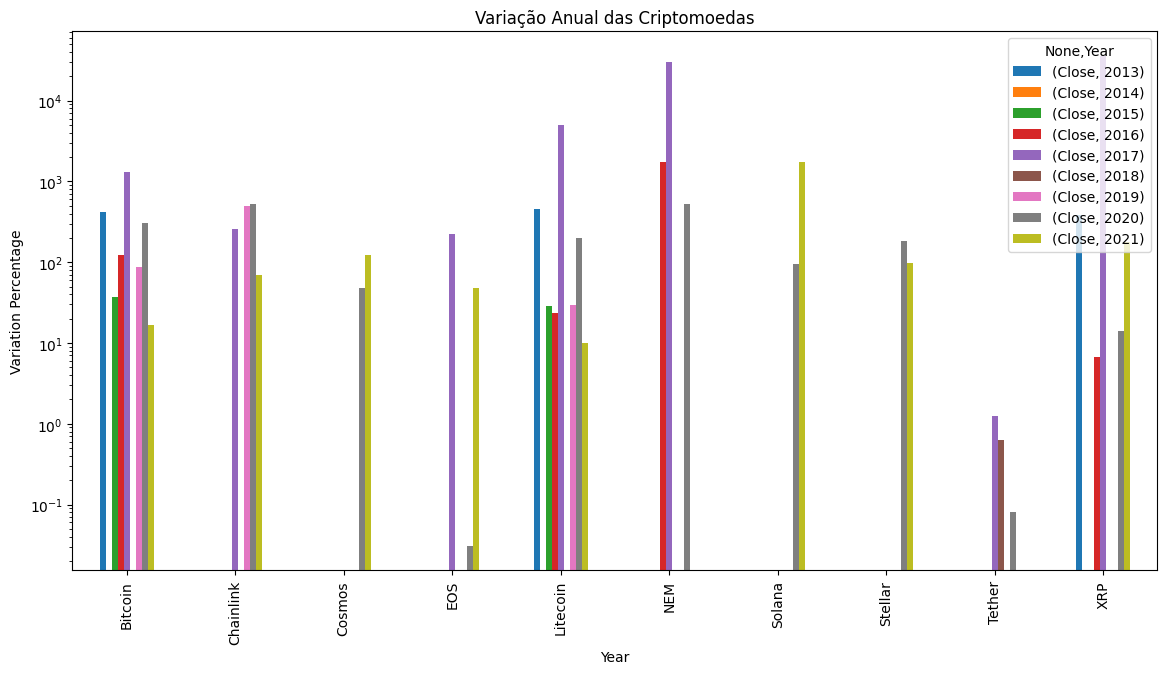

In [482]:
yearly_variation.unstack().plot(kind='bar', figsize=(14, 7))
plt.xlabel('Year')
plt.ylabel('Variation Percentage')
plt.yscale('log')
plt.title('Variação Anual das Criptomoedas')
plt.show()

In [483]:
# 4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?
dfs_unificados['DayOfWeek'] = dfs_unificados['Date'].dt.day_name()
weekday_grouped = dfs_unificados.groupby(['Name', 'DayOfWeek'])
weekday_mean = weekday_grouped['Close'].mean().unstack()
weekday_mean

DayOfWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Name,,,,,,,
Bitcoin,6705.922723,6723.423611,6725.651483,6712.977657,6689.981966,6735.061623,6685.929956
Chainlink,6.282442,6.299734,6.293954,6.333556,6.255945,6.385309,6.309151
Cosmos,6.802304,6.793643,6.774250,6.788695,6.698216,6.828636,6.689722
EOS,4.619669,4.587289,4.677772,4.622043,4.621512,4.622275,4.618249
Litecoin,49.041453,49.275014,49.556040,49.407814,48.791158,49.752798,49.127681
NEM,0.124016,0.125674,0.125202,0.125085,0.123153,0.124794,0.124707
Solana,10.236664,10.580651,10.227554,10.594329,10.529111,10.764334,10.362680
Stellar,0.190630,0.193316,0.192325,0.192020,0.191314,0.195629,0.190606
Tether,1.001164,0.999522,1.001269,1.001105,1.001625,0.999448,1.000738


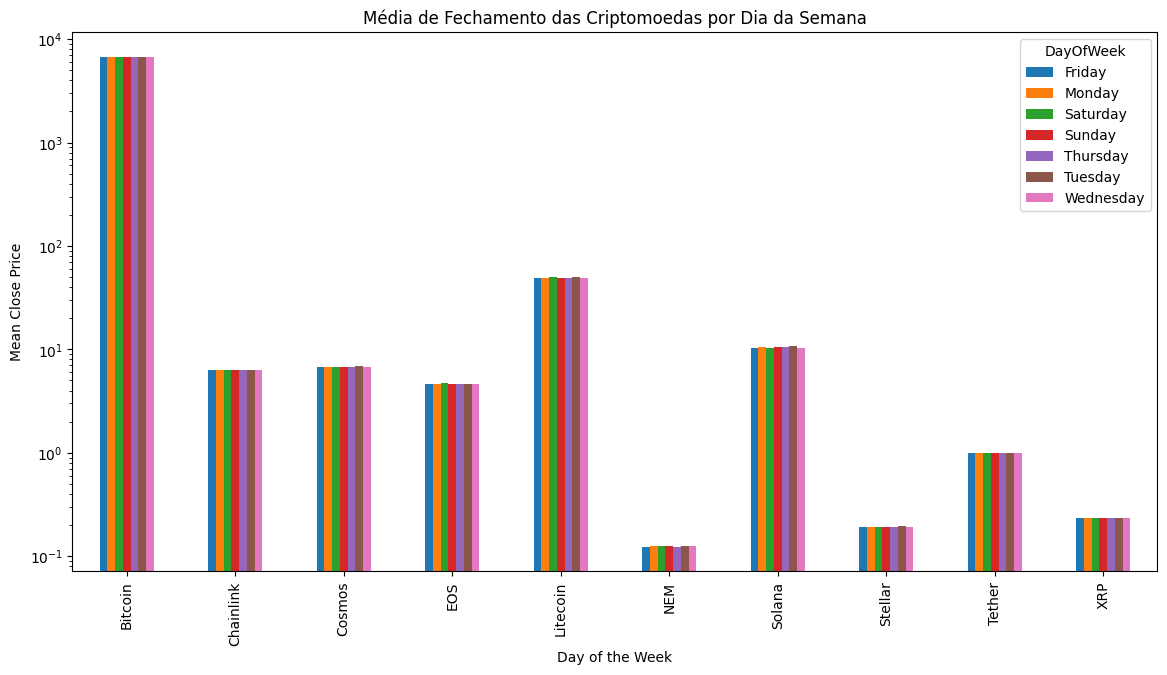

In [484]:
# Plotando a média de fechamento por dia da semana
weekday_mean.plot(kind='bar', figsize=(14, 7))
plt.xlabel('Day of the Week')
plt.ylabel('Mean Close Price')
plt.yscale('log')
plt.title('Média de Fechamento das Criptomoedas por Dia da Semana')
plt.show()

In [485]:
# 5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?
best_crypto = variation.idxmax()
print(f"A moeda mais interessante em relação à valorização é: {best_crypto}")

A moeda mais interessante em relação à valorização é: NEM


In [486]:
# 6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série histórica?
worst_crypto = variation.idxmin()
print(f"A moeda menos interessante em relação à valorização é: {worst_crypto}")

A moeda menos interessante em relação à valorização é: Tether


In [487]:
# 7. Existe correlação entre os valores para todas as criptomoedas?
# Pivotando os dados para ter as moedas como colunas
pivot_df = dfs_unificados.pivot_table(values='Close', index='Date', columns='Name')
correlation = pivot_df.corr()
print(correlation)

Name        Bitcoin  Chainlink    Cosmos       EOS  Litecoin       NEM  \
Name                                                                     
Bitcoin    1.000000   0.933915  0.937844  0.117230  0.812679  0.465714   
Chainlink  0.933915   1.000000  0.926709 -0.029477  0.570216  0.185082   
Cosmos     0.937844   0.926709  1.000000  0.591839  0.925760  0.858711   
EOS        0.117230  -0.029477  0.591839  1.000000  0.594467  0.529662   
Litecoin   0.812679   0.570216  0.925760  0.594467  1.000000  0.764841   
NEM        0.465714   0.185082  0.858711  0.529662  0.764841  1.000000   
Solana     0.716857   0.793002  0.777763  0.841603  0.805546  0.435058   
Stellar    0.954913   0.959866  0.956427  0.805049  0.973954  0.823069   
Tether     0.036403  -0.106127 -0.154573 -0.087321  0.082584  0.118377   
XRP        0.620504   0.322275  0.822957  0.663072  0.875296  0.828128   

Name         Solana   Stellar    Tether       XRP  
Name                                               
Bitcoin

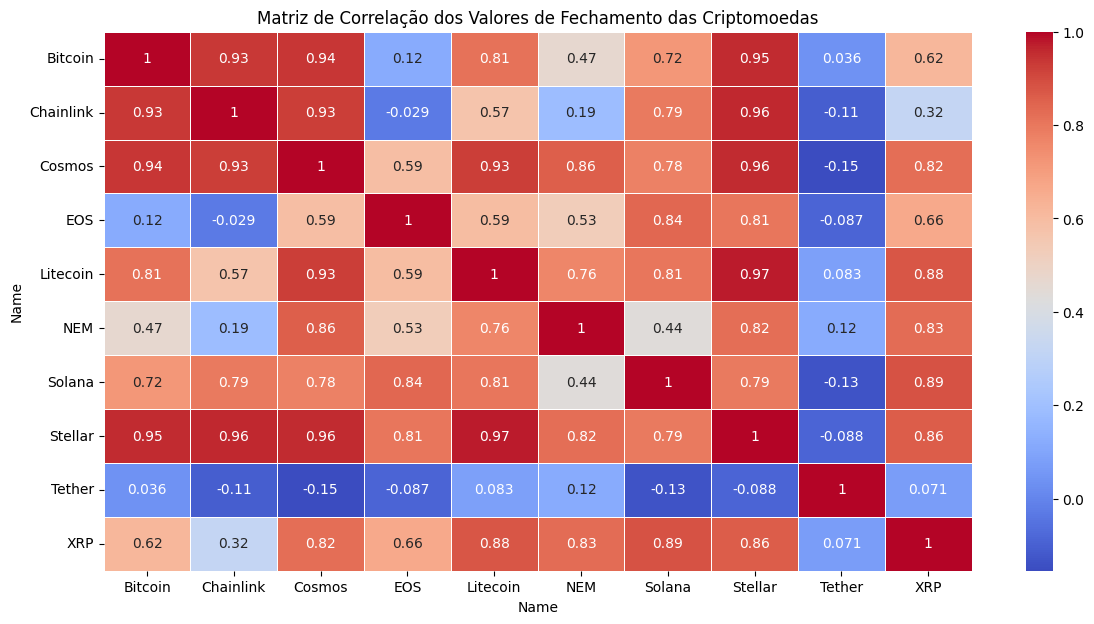

In [488]:
# Plotando a matriz de correlação
plt.figure(figsize=(14, 7))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação dos Valores de Fechamento das Criptomoedas')
plt.show()

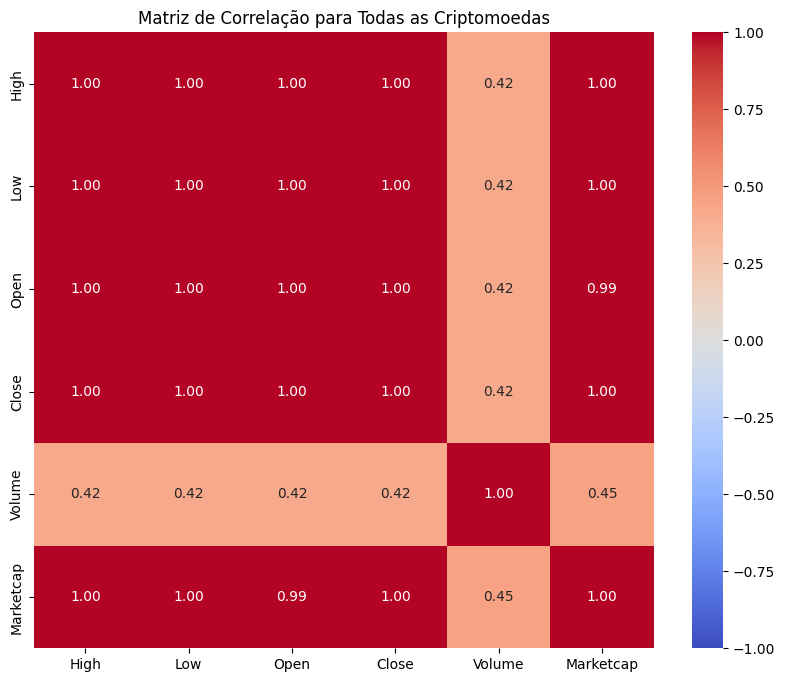

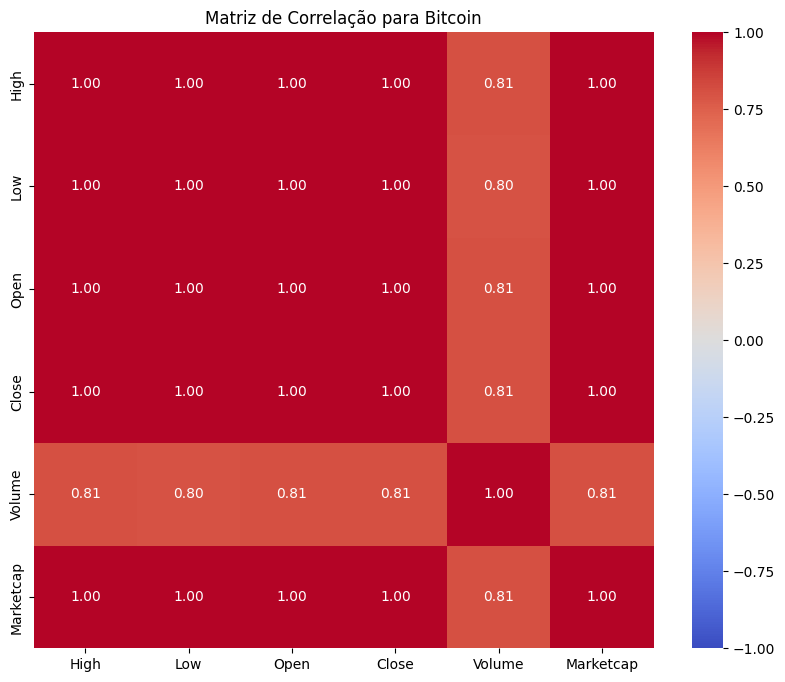

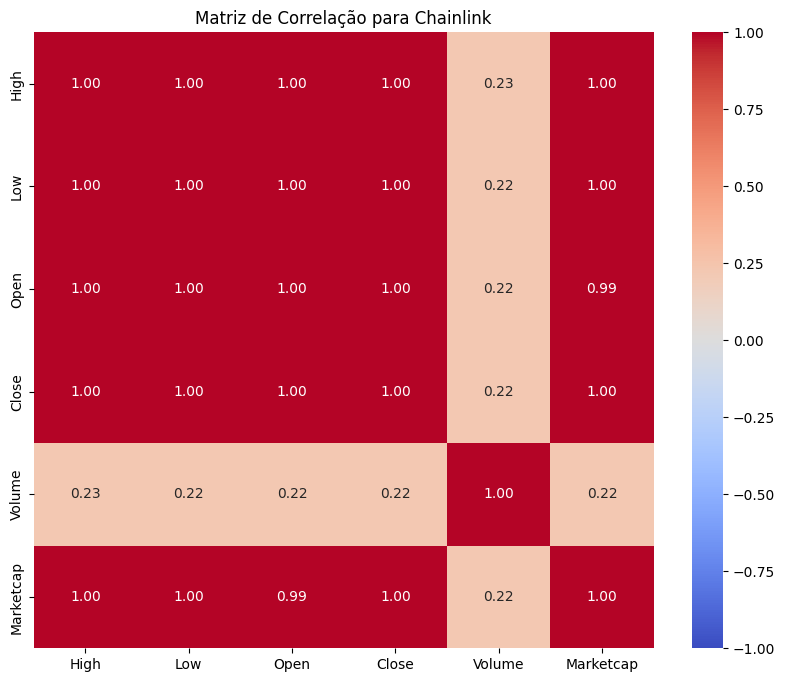

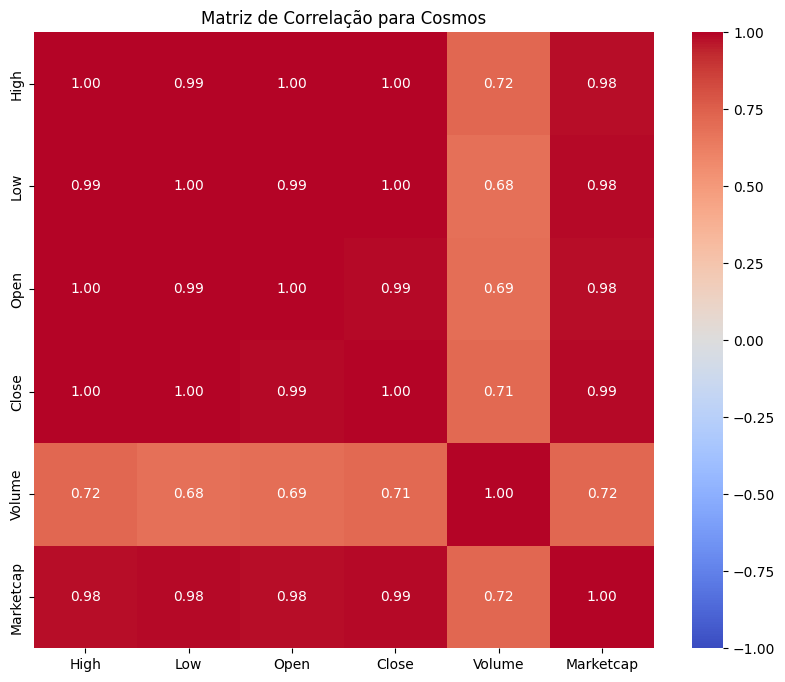

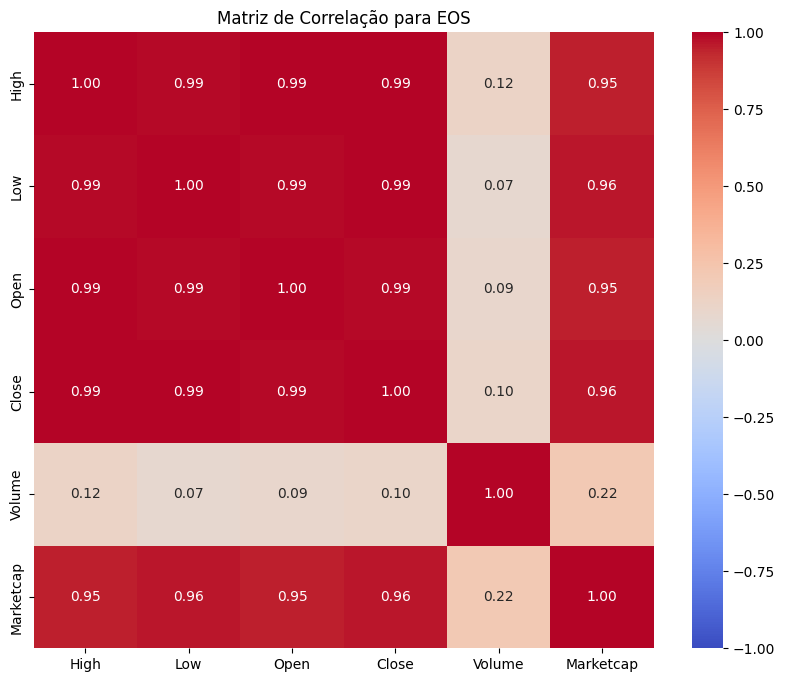

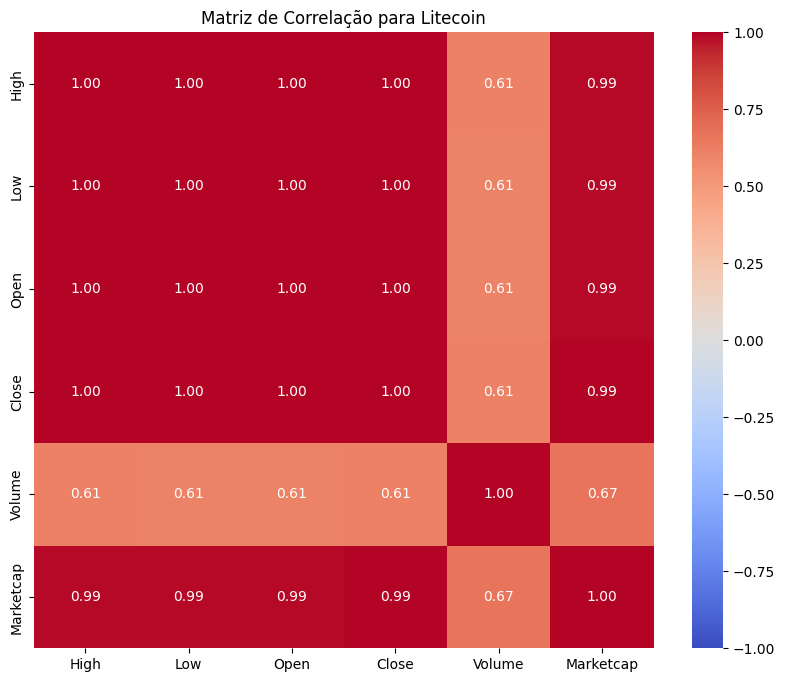

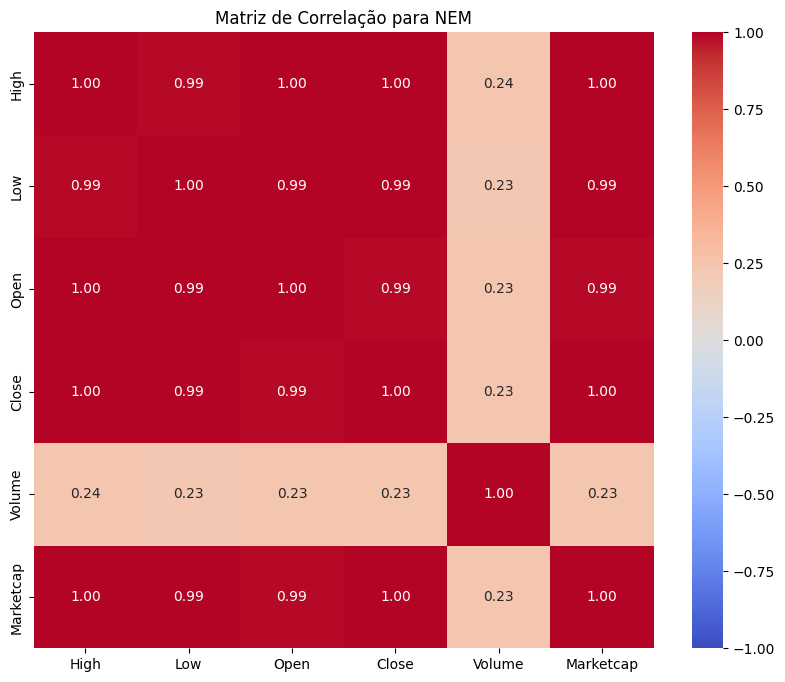

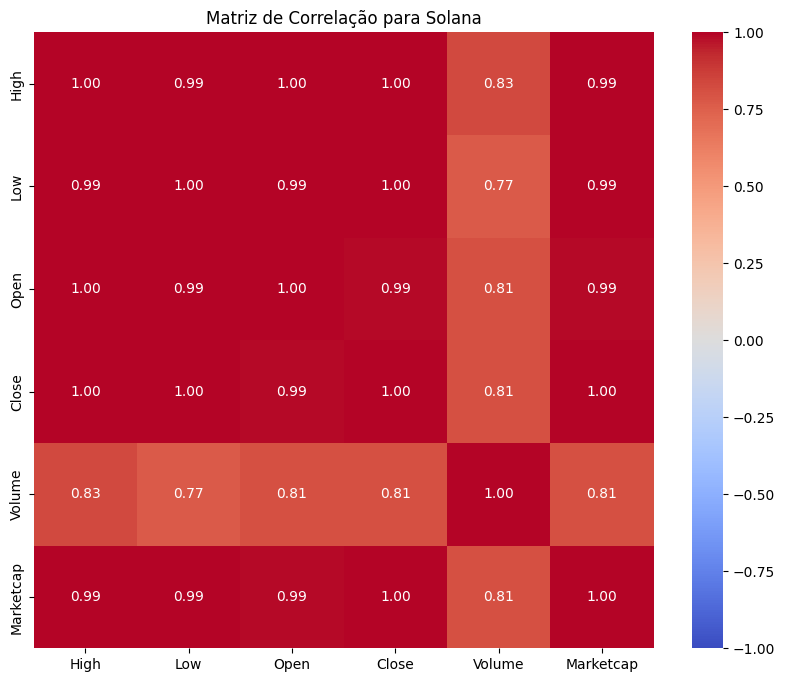

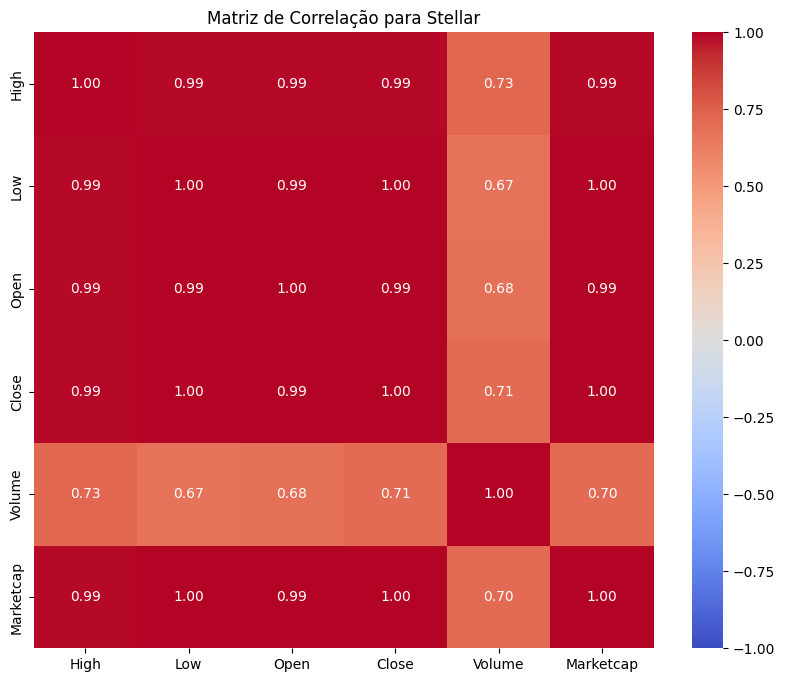

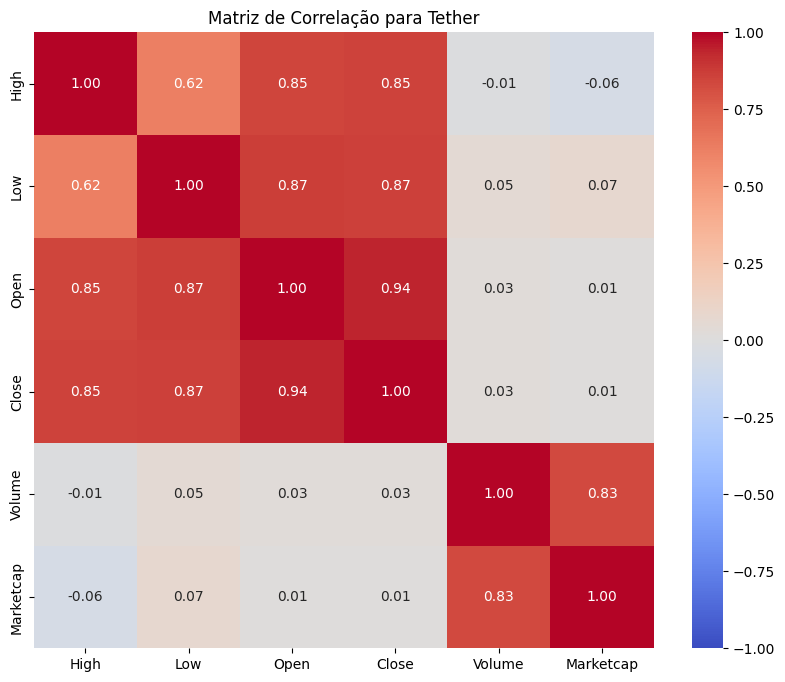

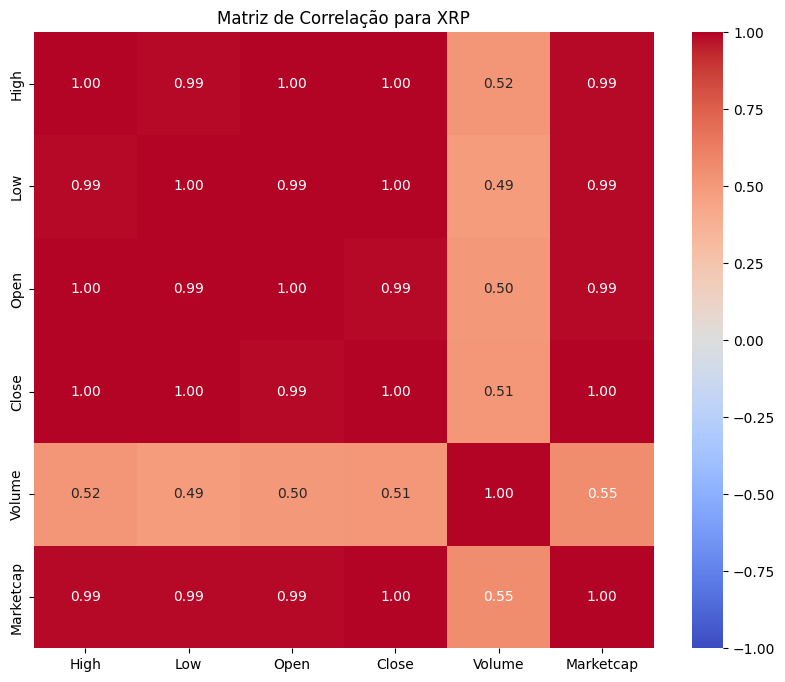

In [489]:
# Convertendo a coluna Date para datetime
dfs_unificados['Date'] = pd.to_datetime(dfs_unificados['Date'])

# Selecionando colunas relevantes para a correlação
columns_of_interest = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

# Agrupando por nome da criptomoeda
crypto_grouped = dfs_unificados.groupby('Name')

# Calculando a correlação para todas as criptomoedas juntas
overall_corr = dfs_unificados[columns_of_interest].corr()

# Plotando a matriz de correlação geral
plt.figure(figsize=(10, 8))
sns.heatmap(overall_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação para Todas as Criptomoedas')
plt.show()

# Plotando matrizes de correlação individuais para cada criptomoeda
for name, group in crypto_grouped:
    corr = group[columns_of_interest].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Matriz de Correlação para {name}')
    plt.show()